In [2]:
# ChatGPT API Python 사용법 (feat.DALL-E, Karlo)
# 출처 : https://wooiljeong.github.io/python/chatgpt-api/?fbclid=IwAR3gVAUFfm5Rji6FGc8h0C5Ql-v0ECg_QuZg7o0gKDvN0_rIYXctYEnE1jU

#pip install openai
!pip install PyKakao


In [6]:
from PyKakao import Karlo

KAKAO_API_KEY = "??"

# Karlo API 인스턴스 생성
karlo = Karlo(service_key = KAKAO_API_KEY)

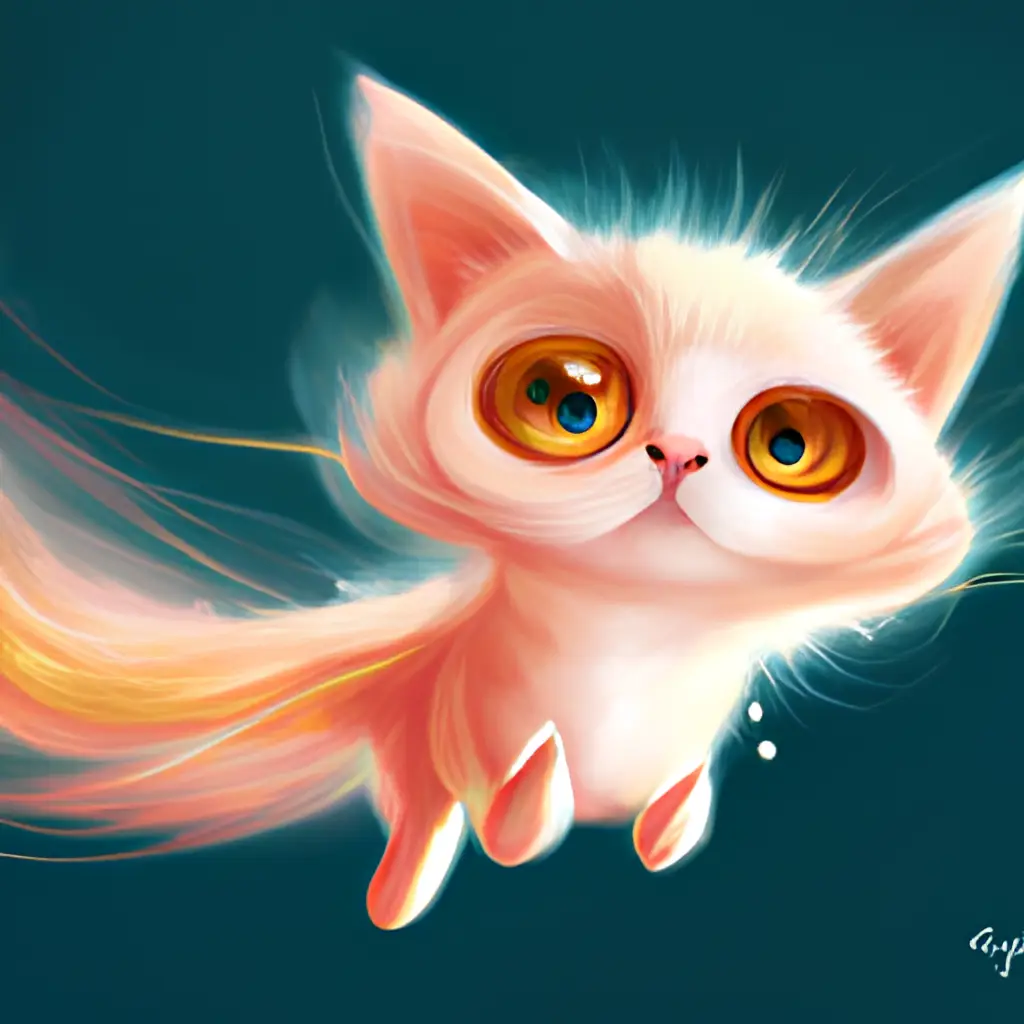

In [8]:
# 프롬프트에 사용할 제시어
text = "Cute magical flyng cat, soft golden fur, fantasy art drawn by Pixar concept artist, Toy Story main character, clear and bright eyes, sharp nose"
# 이미지 생성하기 REST API 호출
img_dict = karlo.text_to_image(text, 1)
#print(img_dict)

# 생성된 이미지 정보
img_str = img_dict.get("images")[0].get('image')

# base64 string을 이미지로 변환
img = karlo.string_to_image(base64_string = img_str, mode = 'RGBA')
img

In [9]:
import openai
from PyKakao import Karlo

# 발급받은 API 키 설정
OPEN_API_KEY = "??"
KAKAO_API_KEY = "??"

# OpenAI 키 설정
openai.api_key = OPEN_API_KEY
# 모델 설정
model = "gpt-3.5-turbo"

# Karlo API 인스턴스 생성
karlo = Karlo(service_key = KAKAO_API_KEY)


In [12]:
# 질문 작성
query = "인간이 달에 산다면, 이때 달에 지은 건축물은 어떤 모습일지, 상상해서 자세히 묘사해 주세요."
print(f'Q: {query}')

# 메시지 설정
# system 메세지에는 디테일 하게 모사 잘하는 역활이라고 부여함.
messages = [
    {
        "role": "system",
        "content": "You play a role in describing the query in detail." # "질문에 디테일하게 묘사하는 역활을 해줘"
    },
    {
        "role": "user",
        "content": query
    }
]

# ChatGPT API 호출
response = openai.ChatCompletion.create(
    model=model,
    messages=messages
)

answer = response['choices'][0]['message']['content']
print('A:')
print(answer)

Q: 인간이 달에 산다면, 이때 달에 지은 건축물은 어떤 모습일지, 상상해서 자세히 묘사해 주세요.
A:
만약 인간이 달에 산다면, 건축물은 우선적으로 달의 궤도상에서 안정적으로 위치할 수 있는 장소에 지어지게 될 것입니다. 이를 위해 먼저 지표면을 평탄화하거나, 원하는 위치에 기초석을 놓는 등의 조치가 필요할 것입니다.

그리고 건축물은 달의 광선을 차단해야 하므로, 외부에서 들어오는 방사선을 차단할 수 있도록 설계되어야 합니다. 이를 위해 지붕은 두꺼운 재료로 만들어져야 하며, 벽도 방사선을 차단할 수 있는 재료로 쌓아질 것입니다. 또한, 달의 엄청난 온도차에도 견딜 수 있도록 내부와 외부의 공기압이나 온도를 제어할 수 있는 시스템이 있어야 할 것입니다.

또한, 인간들이 생활하기에 필요한 시설들이 담긴 건축물을 상상해 볼 수 있습니다. 여러 개의 방이나 화장실, 주방 등 생활에 필요한 시설들이 마련될 것입니다. 또한, 지원 시설들도 필요할 것입니다. 예를 들어, 식물이나 식량을 보존할 수 있는 작은 농장이나 육체를 유지할 수 있는 운동 시설 등이 될 수 있습니다.

이러한 시설들은 인간들이 달에 오랜 시간 동안 살아남기 위해 꼭 필요합니다. 그리고 이러한 달의 건축물은 언젠가는 우주 여행을 더욱 더 발전시키는데 큰 역할을 할 것입니다.


In [13]:
# 더 구체적인 묘사 요청
# 앞에서 묘사한 answer를 assistant 메시지로 추가
messages.append(
    {
        "role": "assistant",
        "content": answer
    },
)

# 사용자 메시지 추가
messages.append(
    {
        "role": "user",
        "content": "위 내용을 바탕으로 외형적인 모습을 더 자세히 상상해서 묘사해 주세요."
    }
)

# ChatGPT API 호출
response = openai.ChatCompletion.create(
    model=model,
    messages=messages
)

answer2 = response['choices'][0]['message']['content']
print('A:')
print(answer2)

A:
달의 건축물은 파노라마적인 경관을 즐길 수 있는 건물일 것입니다. 이 건물은 건축 디자이너들이 아름답고 창의적인 디자인을 제시할 수 있는 하나의 새로운 캔버스가 될것입니다.

바깥쪽 전경을 즐길 수 있도록 큰 창문을 설계할 것입니다. 이 창문은 지구에서 달을 바라보는 사람들도 볼 수 있도록 태양 반사를 방지하는 안전한 재료로 만들어졌을것입니다. 이 창문은 동시에 밤하늘의 별들을 감상할 수 있도록 특별한 틈새를 갖출 것입니다.

내부는 모듈식으로 설계될 것입니다. 모든 모듈은 서로 간섭하지 않도록 디자인되어, 건물의 안정성을 유지하면서 이동할 수 있는 영역으로 구성될 것입니다. 파티션으로 구성된 각 모듈은 건축가들이 각각의 개인 공간이나, 특수 시설을 설계할 수 있도록 공간적 자유도를 유지할 것입니다.

건물의 외부는 달 표면과 조화를 이루도록 디자인될 것입니다. 건물의 주변 지형과 유사한 색과 패턴의 재료를 사용할 것입니다. 건축물 자체가 장소의 환경과 어우러진 자연스러운 외형을 가지도록 조명과 인공적인 요소를 사용할 것입니다.

보안과 안전에 대한 고려도 중요할 것입니다. 건물의 외부로의 출입은 강력한 보안 시스템에 의해 제어될 것입니다. 또한 전통적인 안전을 위한 시스템도 구축될 것입니다. 만일 어떤 문제가 발생하거나 위험이 우려될 경우 기능들이나 시스템들이 백업 되어 지속적인 안전을 보장할 것입니다.


In [14]:
# 영어 번역 요청
# 시스템 메시지도 번역 역활 설정
messages = [
    {
        "role": "system",
        "content": "You are a helpful assistant who is good at translating."
    },
    {
        "role": "assistant",
        "content": answer2
    }
]

# 사용자 메시지 추가
messages.append(
    {
        "role": "user",
        "content": "영어로 번역해 주세요"
    }
)

# ChatGPT API 호출
response = openai.ChatCompletion.create(
    model=model,
    messages=messages
)

answer3 = response['choices'][0]['message']['content']
print('A:')
print(answer3)

A:
The buildings on the moon would be structures with a panoramic view to enjoy. This architecture would become a canvas for designers to offer beautiful and creative designs.

To enjoy the outside view, large windows would be designed with a safe material to prevent solar reflection, making it visible for observers from Earth. These windows would have special gaps to appreciate the stars at night.

The inside would be designed in a modular way. Each module would be designed to move to non-interfering areas to maintain stability and preserve individual freedom. The partitions that composed each module would maintain spatial freedom to allow architects the ability to create special facilities or individual spaces.

The exterior of the buildings would be designed to be in harmony with the lunar surface. The material used for the exterior would be similar in color and pattern to the surrounding terrain. Lighting and artificial elements would be used to give a natural appearance to the bui

In [15]:
# 이미지 생성을 위한 프롴프트 작성 요청
# 영어로 번역된 결과를 바탕으로 이미지 생성 AI 사용 시 필요한 프롬프트 문장을 작성합니다. 새 메시지를 구성하고, 
# 시스템 메시지로 이미지 생성을 위해 프롬프트를 생성하는 걸 잘하는 역할을 어시스턴트에게 부여합니다. 
# 그리고 사용자 메시지로 프롬프트를 작성해달라는 내용을 작성합니다. 이 결과를 ‘answer4’에 할당합니다.

# 새 메시지 구성
messages = [
    {
        "role": "system",
        "content": "You are an assistant who is good at creating prompts for image creation."
    },
    {
        "role": "assistant",
        "content": answer3
    }
]

# 사용자 메시지 추가
messages.append(
    {
        "role": "user", 
        "content": "Condense up to 4 outward description to focus on nouns and adjectives separated by ,"
    }
)

# ChatGPT API 호출하기
response = openai.ChatCompletion.create(
    model=model,
    messages=messages
)
answer4 = response['choices'][0]['message']['content']
print(answer4)

Moon buildings: panoramic, safe, modular, harmonious


In [16]:
# 프롬프트 완성하기
#프롬프트에 스타일을 추가하면 더 고품질의 이미지를 얻을 수 있습니다. 
# 앞에서 추출한 키워드들과 이미지를 꾸며주는 파라미터를 적절히 섞어 ‘prompt’에 할당합니다. 뒤에서 이 값을 Karlo와 DALL-E API의 인자로 입력합니다.

# 이미지 생성을 위한 프롬프트
params = ", concept art, realistic lighting, ultra-detailed, 8K, photorealism, digital art"
prompt = f"Futuristic moon villages, {answer4}{params}"
print(prompt)

Futuristic moon villages, Moon buildings: panoramic, safe, modular, harmonious, concept art, realistic lighting, ultra-detailed, 8K, photorealism, digital art


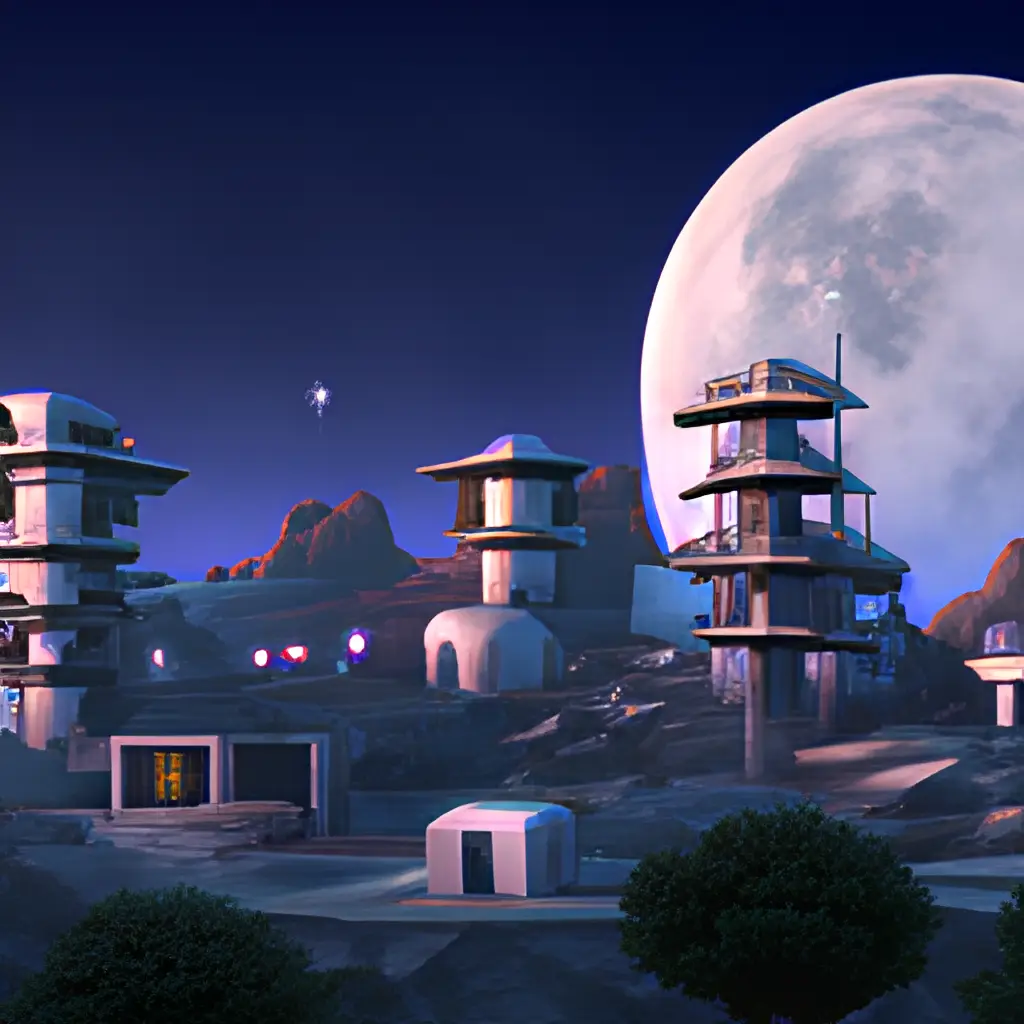

In [17]:
#Karlo에게 이미지 생성 요청하기
#-앞에서 생성한 이미지 생성을 위한 프롬프트 결과인 ‘prompt’ 값을 karlo api에 전달해 이미지 생성을 요청합니다

# 이미지 생성하기 REST API 호출
img_dict = karlo.text_to_image(prompt, 1)

# 생성된 이미지 정보
img_str = img_dict.get("images")[0].get('image')

# base64 string을 이미지로 변환
img = karlo.string_to_image(base64_string = img_str, mode = 'RGBA')
img

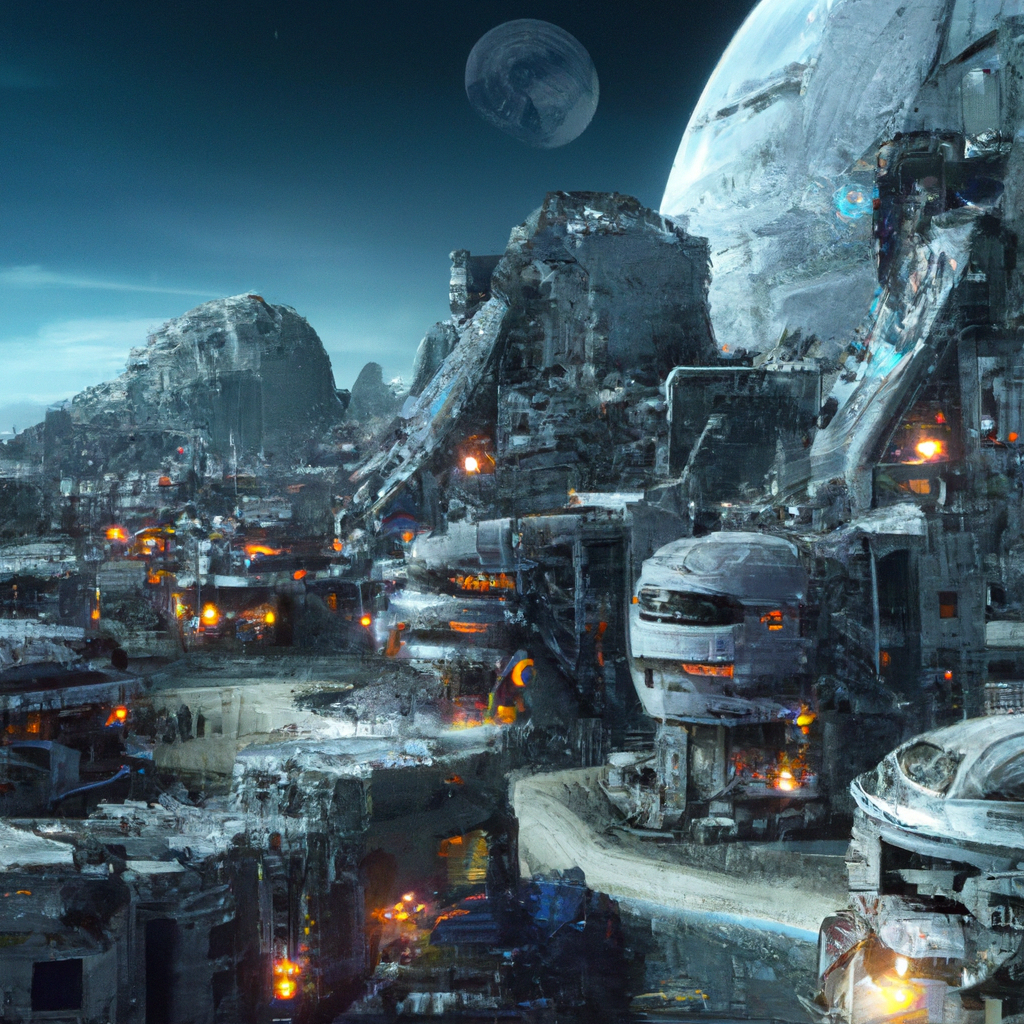

In [20]:
#DALL-E에게 이미지 생성 요청하기
#‘openai’ 라이브러리를 이용하면 ChatGPT API 외에도 DALL-E API도 사용할 수 있습니다. 
#‘openai.Image.create()’에 이미지 생성을 위해 필요한 프롬프트를 입력하고, 출력할 이미지의 갯수와 크기를 설정하기만 하면 됩니다. 
# 생성된 이미지는 URL 형태로 제공되므로 requests 라이브러리로 해당 URL의 이미지를 별도로 불러와야 합니다.

import requests
from PIL import Image
from io import BytesIO

response = openai.Image.create(
    prompt=prompt,
    n=1,
    size="1024x1024"
)

image_url = response['data'][0]['url']
res = requests.get(image_url)
img = Image.open(BytesIO(res.content))
img